The following is code and motivation for a series of simulations I ran for my Maths in Action project. Not all of the simulations have been used in the project, and I choose to emit setting seeds. this is to fit the narrative of letting any reader edit the code in the end of the Popular Article. The code I haven't used in the project, is likely to be at the end. For model definitions, I often return the opinions, but in some of the investigations they are unnecessary (I use these values for personal checks).

First I define an elementary DeGroot model, to have a foundation for the models I will use subsequently.

W denotes the weight matrix and represents the influence between agents. initial_opinions represents the initial opinions of the agents. This paramater is taken in as an array. max_iter defines the maximum number of iterations in the simulation, and provides a limit in case the model runs for too long. The tolerance parameter determines when to stop the iterations of the model. When the difference in opinions is sufficiently small, then we can consider the opinions to no longer change, and present the final opinions and prevent the model from unnecessarily running for a long period of time afterwards.

In [2]:
import numpy as np

def degroot_model(W, initial_opinions, max_iter=100, tolerance=1e-5):
    
    opinions = np.array(initial_opinions) # I initalise the opinions as an array
    for iteration in range(max_iter): # Looping over the amount of iterations
        new_opinions = np.dot(W, opinions) # Calculating the new opinions by multiplying weight matrix with old opinions
        # Investigating if opinions exhibit change; checking for convergence
        if np.allclose(new_opinions, opinions, atol=tolerance):
            break
        opinions = new_opinions
    return opinions, iteration + 1 # returning the array

Below, I test the code. As per the the discussion of consensus reaching in the DeGroot model, one would expect the final opinion to be around halfway of the largest and smallest initial opinion respectively. Also the set of opinions should have similar values with the differences dependant on the tolerance parameter. The code can be used to investigate the time it would take/amount of discussions it would take for agents to settle on an opinion. I test the code in the following. In this arbitrary context, I consider -1 to represent an agent expressing complete disagreement and 1 to represent their opinion being of complete agreement. Per consequence, 0 is a nuetral stance.

In [3]:
n_agents = 30  
# Create a random weight matrix
W = np.random.rand(n_agents, n_agents)
# Normalise the weight matrix to satisfy the definiton of the weight values
W = W / np.sum(W, axis=1, keepdims=True)

# Initialise opinions randomly between -1 and 1
initial_opinions = np.random.uniform(-1, 1, n_agents)
print("Initial opinions of the agents:", initial_opinions)

# Run the DeGroot model
final_opinions, num_iterations = degroot_model(W, initial_opinions)
print("Final opinions of the agents:", final_opinions)
print("Number of Iterations:", num_iterations)

Initial opinions of the agents: [-0.80026725  0.46625349 -0.21608632  0.8444719  -0.4735529   0.2576178
 -0.38833176 -0.33996276 -0.71734627 -0.9505507  -0.74369866 -0.65759305
 -0.37420219  0.64104904  0.88506401 -0.21172823 -0.9733835   0.71405966
 -0.52120206  0.69496403  0.52204587  0.16552711  0.64809283  0.28289213
 -0.60188578 -0.83855212  0.8127413   0.66930092 -0.01912675  0.87505774]
Final opinions of the agents: [0.00231364 0.00231337 0.00231374 0.0023135  0.00231326 0.00231414
 0.00231444 0.00231361 0.00231405 0.00231331 0.00231442 0.00231285
 0.00231435 0.00231474 0.00231432 0.00231483 0.00231221 0.00231432
 0.00231483 0.00231248 0.00231335 0.00231373 0.00231416 0.00231324
 0.0023134  0.00231406 0.00231468 0.00231326 0.00231511 0.00231342]
Number of Iterations: 7


The following defines a model for a DeGroot model simulation, to plot a histogram of the consensus reaching times, under different frequencies of agents. I randomise the intitial opinions over the interval and average the iteration times over simulations, to control this variable. I similarly do this for the weight matrix, and I normalise th row sums to ensure the entries of the matrix, function as weights. These measures, allow me to investigate the impact of the number of agents.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Writing out the DeGroot model for reference

def degroot_model(W, initial_opinions, max_iter=100, tolerance=1e-5):
    opinions = np.array(initial_opinions)
    for iteration in range(max_iter):
        new_opinions = np.dot(W, opinions)
        if np.allclose(new_opinions, opinions, atol=tolerance):
            break
        opinions = new_opinions
    return opinions, iteration + 1

# Defining the function for the first investigation

def run_investigation_one(min_agents, max_agents, num_simulations):
    agents_range = range(min_agents, max_agents + 1)
    iterations_by_category = {}  # Storing iteration counts by category
    categories = []  

    for n_agents in agents_range:
        # Categorising the number of agents into ranges of 10 for the hsitogram
        category = f'{((n_agents - 1) // 10) * 10 + 1}-{((n_agents - 1) // 10 + 1) * 10}'

        if category not in iterations_by_category:
            iterations_by_category[category] = []
            categories.append(category)

        for _ in range(num_simulations):
            W = np.random.rand(n_agents, n_agents)
            W = W / np.sum(W, axis=1, keepdims=True)
            initial_opinions = np.random.uniform(-1, 1, n_agents)
            _, num_iterations = degroot_model(W, initial_opinions)
            iterations_by_category[category].append(num_iterations)

    # Preparing data for the stacked histogram, including colours, and grouping the data together
    data_to_plot = [iterations_by_category[cat] for cat in categories]
    colours = plt.cm.viridis(np.linspace(0, 1, len(categories)))
    
    # Plotting the stacked histogram
    plt.hist(data_to_plot, bins=25, stacked=True, color=colours, label=categories)
    plt.xlabel('Iterations Needed to Reach Consensus')
    plt.ylabel('Frequency')
    plt.title('Distribution of Iterations for Consensus by Agent Count')
    plt.legend(title='Agent Ranges', loc='upper right')
    plt.tight_layout()
    plt.show()

Running the investigation for 1 to 100 agents, running 50 simulations for each number of agents. Hence one should expect 5000 simulations in each interval of agents.

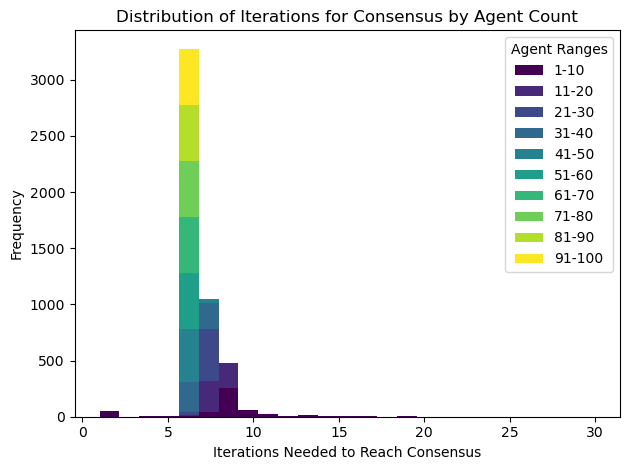

In [6]:
run_investigation_one(1, 100, 50)

I now define an investigation into the impact of the tolerance parameter. The code is initialised at 2, as investigating the consensus reaching times of 1 agent would be trivial, and consequently skew the results in a line plot. I use similar measures as the previous simulation, to control other variables in the code.

<Figure size 1000x600 with 0 Axes>

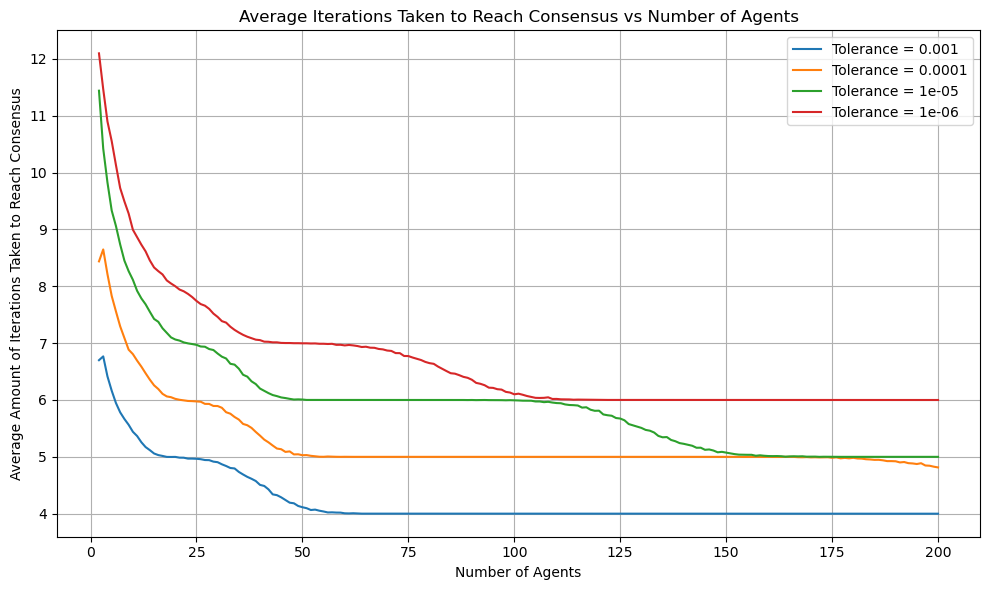

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# I choose a placeholder tolerance, but vary the tolerance in the subsequent function
def degroot_model(W, initial_opinions, max_iter=100, tolerance=1e-6):
    opinions = np.array(initial_opinions)
    for iteration in range(max_iter):
        new_opinions = np.dot(W, opinions)
        if np.allclose(new_opinions, opinions, atol=tolerance):
            break
        opinions = new_opinions
    return opinions, iteration + 1

# Altering the investigation to plot a line graph and running the simulations for several tolerances 
def run_investigation_two(min_agents, max_agents, num_simulations, tolerance):
    agents_range = range(min_agents, max_agents + 1)
    average_iterations_needed = []

    for n_agents in agents_range: # repeating for different numbers of agents
        iterations = []
        for _ in range(num_simulations):
            W = np.random.rand(n_agents, n_agents)
            W = W / np.sum(W, axis=1, keepdims=True)
            initial_opinions = np.random.uniform(-1, 1, n_agents)
            _, num_iterations = degroot_model(W, initial_opinions, tolerance=tolerance)
            iterations.append(num_iterations)
        average_iterations_needed.append(np.mean(iterations)) # averaging over the iteration times

    return agents_range, average_iterations_needed

# I range over colours of blue to make the plot look visually appealing
plt.figure(figsize=(10, 6))
tolerances = [1e-3, 1e-4, 1e-5, 1e-6]
colors = ['lightblue', 'blue', 'royalblue', 'darkblue']

plt.figure(figsize=(10, 6))
tolerances = [1e-3, 1e-4, 1e-5, 1e-6]
for tol in tolerances: # indexing over the range of tolerances
    agents_range, average_iterations = run_investigation_two(2, 200, 1000, tol)
    plt.plot(agents_range, average_iterations, label=f'Tolerance = {tol}')

plt.xlabel('Number of Agents')
plt.ylabel('Average Amount of Iterations Taken to Reach Consensus')
plt.title('Average Iterations Taken to Reach Consensus vs Number of Agents')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Defining the Social Network DeGroot model, to repeat the investigations but for the Social Network DeGroot model instead. I initialise the termination of the iterations if they exceed 300 for computational efficiency and cost. I chose 300 after investigating various ranges and believe it to be sufficiently large to vofisualise all  the dynamics in this model. This is a variable, so it can be edited. The rows of the weight matrix sum to 1, by definition of the Social Network DeGroot Model

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def social_network_degroot_model(n_agents, tolerance=1e-5, max_iter=300): 
    adj_matrix = np.random.randint(0, 2, (n_agents, n_agents))
    np.fill_diagonal(adj_matrix, 1)  # Initialising the self-trust
    
    betas = np.random.uniform(0, 0.5, n_agents) # Randomly generating the beta values (self-trust values) in a certain range
    W = np.zeros_like(adj_matrix, dtype=float) # Initialising the weight matrix
    for i in range(n_agents):
        for j in range(n_agents):
            if adj_matrix[i, j] == 1: 
                if i == j:  # Assigning the beta values to Self-trust
                    W[i, j] = betas[i]
                else: # Calculating the off diagonal weight entries using the adjacencu matrix and beta values
                    W[i, j] = (1 - betas[i]) * adj_matrix[i, j] / (np.sum(adj_matrix[i, :]) - 1)
    
    # The rest is simialr to the DeGroot model function
    
    opinions = np.random.uniform(-1, 1, n_agents)
    
    for iteration in range(max_iter):
        new_opinions = np.dot(W, opinions)
        if np.allclose(new_opinions, opinions, atol=tolerance):
            break
        opinions = new_opinions
    
    return opinions, iteration + 1


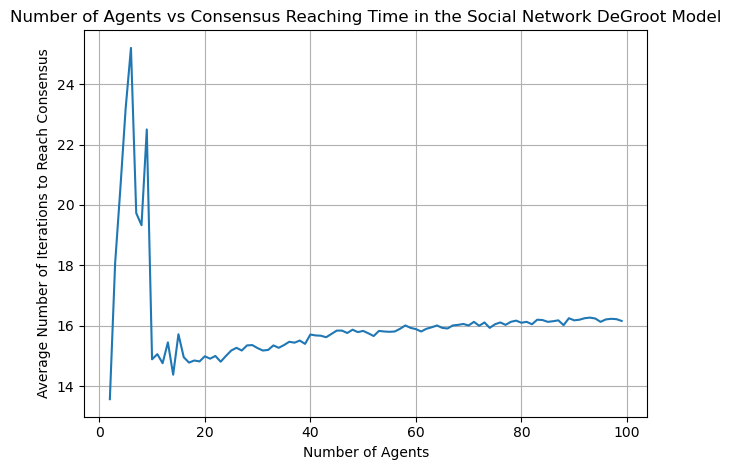

In [20]:

def investigate_iterations(n_agents_list, num_simulations):
    average_iterations_needed = []
    for n_agents in n_agents_list:
        iterations_list = []
        for _ in range(num_simulations):
            _, iterations = social_network_degroot_model(n_agents)
            iterations_list.append(iterations)
        average_iterations_needed.append(np.mean(iterations_list))
    return n_agents_list, average_iterations_needed

n_agents = range(2, 100)  
max_iter = 100  

# Run the investigation
agents, avg_iterations_needed = investigate_iterations(n_agents, max_iter)

# Plotting the results
plt.plot(agents, avg_iterations_needed)
plt.xlabel('Number of Agents')
plt.ylabel('Average Number of Iterations to Reach Consensus')
plt.title('Number of Agents vs Consensus Reaching Time in the Social Network DeGroot Model')
plt.tight_layout()  
plt.grid(True)
plt.show()


I run investigation 1 again, but now for the Social Network DeGroot model. The code is almost identical but now I pass a different function into the investigation and reduce the amount of iterations as a placeholder, for computational cost. 

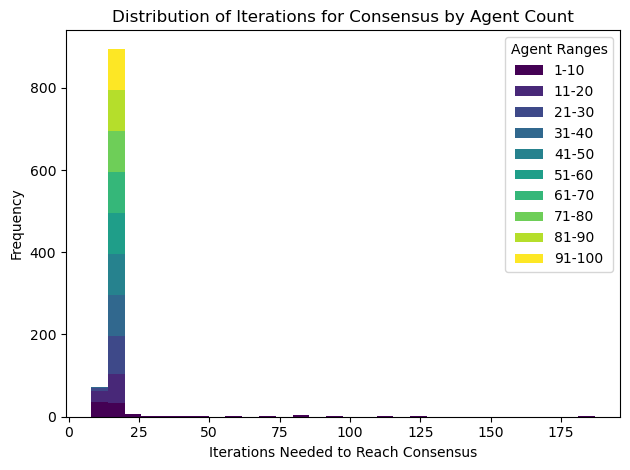

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def social_network_degroot_model(n_agents, tolerance=1e-5, max_iter=300): 
    adj_matrix = np.random.randint(0, 2, (n_agents, n_agents))
    np.fill_diagonal(adj_matrix, 1)  # Initialising the self-trust
    
    betas = np.random.uniform(0, 0.5, n_agents) # Randomly generating the beta values (self-trust values) in a certain range
    W = np.zeros_like(adj_matrix, dtype=float) # Initialising the weight matrix
    for i in range(n_agents):
        for j in range(n_agents):
            if adj_matrix[i, j] == 1: 
                if i == j:  # Assigning the beta values to Self-trust
                    W[i, j] = betas[i]
                else: # Calculating the off diagonal weight entries using the adjacencu matrix and beta values
                    W[i, j] = (1 - betas[i]) * adj_matrix[i, j] / (np.sum(adj_matrix[i, :]) - 1)
    
    # The rest is similar to the DeGroot model function
    
    opinions = np.random.uniform(-1, 1, n_agents)
    
    for iteration in range(max_iter):
        new_opinions = np.dot(W, opinions)
        if np.allclose(new_opinions, opinions, atol=tolerance):
            break
        opinions = new_opinions
    
    return opinions, iteration + 1

def run_investigation_one_sn(min_agents, max_agents, num_simulations):
    agents_range = range(min_agents, max_agents + 1)
    iterations_by_category = {}  
    categories = [] 

    for n_agents in agents_range:
        category = f'{((n_agents - 1) // 10) * 10 + 1}-{((n_agents - 1) // 10 + 1) * 10}'

        if category not in iterations_by_category:
            iterations_by_category[category] = []
            categories.append(category)

        for _ in range(num_simulations):
            _, num_iterations = social_network_degroot_model(n_agents)
            iterations_by_category[category].append(num_iterations)

    data_to_plot = [iterations_by_category[cat] for cat in categories]
    colours = plt.cm.viridis(np.linspace(0, 1, len(categories))) 
    
    # Plotting the stacked histogram
    plt.hist(data_to_plot, bins=30, stacked=True, color=colours, label=categories)
    plt.xlabel('Iterations Needed to Reach Consensus')
    plt.ylabel('Frequency')
    plt.title('Distribution of Iterations for Consensus by Agent Count')
    plt.legend(title='Agent Ranges', loc='upper right')
    plt.tight_layout()
    plt.show()

# Example: Investigating the range of 2 to 100 agents, running 100 simulations for each number of agents
run_investigation_one_sn(2, 100, 10)


This following is a modification of investigation 2 to produce the line graphs. I use a matching colour scheme, with the only difference being the usage of the Social Network DeGroot model. I modified the subsequent code for different beta values, and ranges of agents, for other investigations, that are discussed in the scholarly report in the appendix or the popular article.

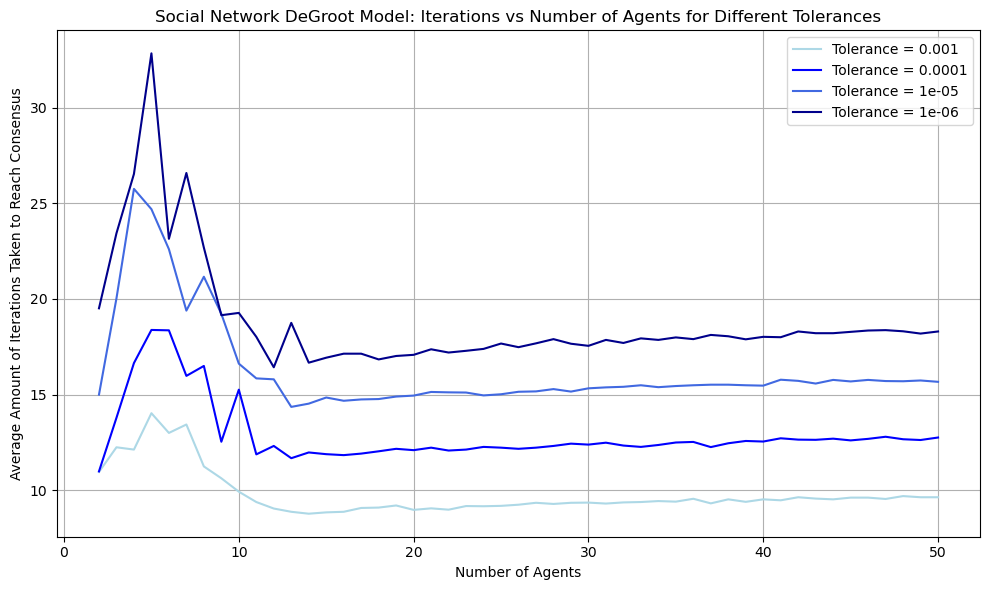

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def social_network_degroot_model(n_agents, tolerance=1e-5, max_iter=300): 
    adj_matrix = np.random.randint(0, 2, (n_agents, n_agents))
    np.fill_diagonal(adj_matrix, 1)  # Initialising the self-trust
    
    betas = np.random.uniform(0, 0.5, n_agents) # Randomly generating the beta values (self-trust values) in a certain range
    #betas = np.random.uniform(0, 0.25, n_agents)
    #betas = np.random.uniform(0.5, 1, n_agents)
    W = np.zeros_like(adj_matrix, dtype=float) # Initialising the weight matrix
    for i in range(n_agents):
        for j in range(n_agents):
            if adj_matrix[i, j] == 1: 
                if i == j:  # Assigning the beta values to Self-trust
                    W[i, j] = betas[i]
                else: # Calculating the off diagonal weight entries using the adjacencu matrix and beta values
                    W[i, j] = (1 - betas[i]) * adj_matrix[i, j] / (np.sum(adj_matrix[i, :]) - 1)
    
    # The rest is similar to the DeGroot model function
    
    opinions = np.random.uniform(-1, 1, n_agents)
    
    for iteration in range(max_iter):
        new_opinions = np.dot(W, opinions)
        if np.allclose(new_opinions, opinions, atol=tolerance):
            break
        opinions = new_opinions
    
    return opinions, iteration + 1

def run_investigation_two_sn(min_agents, max_agents, num_simulations, tolerance):
    agents_range = range(min_agents, max_agents + 1)
    average_iterations_needed = []
    
    for n_agents in agents_range:
        iterations = []
        for _ in range(num_simulations):
            _, num_iterations = simulate_social_network_degroot_model(n_agents, tolerance)
            iterations.append(num_iterations)
        average_iterations_needed.append(np.mean(iterations))
    
    return agents_range, average_iterations_needed

plt.figure(figsize=(10, 6))
tolerances = [1e-3, 1e-4, 1e-5, 1e-6]
colors = ['lightblue', 'blue', 'royalblue', 'darkblue']

for index, tol in enumerate(tolerances):
    agents_range, average_iterations = run_investigation_two_sn(2, 100, 100, tol)  
    plt.plot(agents_range, average_iterations, label=f'Tolerance = {tol}', color=colors[index])

plt.xlabel('Number of Agents')
plt.ylabel('Average Amount of Iterations Taken to Reach Consensus')
plt.title('Social Network DeGroot Model: Iterations vs Number of Agents for Different Tolerances')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Investigating the impact of the weight matrices. Continuing to uniformally distribute for the intitial opinions, I know explictly investigate a few different weight matrices and their effect on consensus reaching. The matrices in question are a random weight matrix where each element is a random number and the rows are normalised. A dominant diagonal matrix, where higher weights are on the diagonal, with the rest of the entries being ranomised. This represents each agent valuing their own opinion above all others. The fully connected matrix, is where all of the agents have equal influence amongst each other. Hence all of the elements are equal. Finally the sparse matrix, where there are limited connections between agents. Consequently, most elements are zero. I include a modification of the DeGroot model also (where I removed the opinions as at this point I believe they are unnecessary to any checks or simulations I want to run for the weight matrices), so that I can vary over the matrices. I incldue a variable for the sparsity matrix to allow varying this data. I mainly used this so I can choose a level of sparsity to be reflective of the results, without skewing the graphs (due to one value being too large).

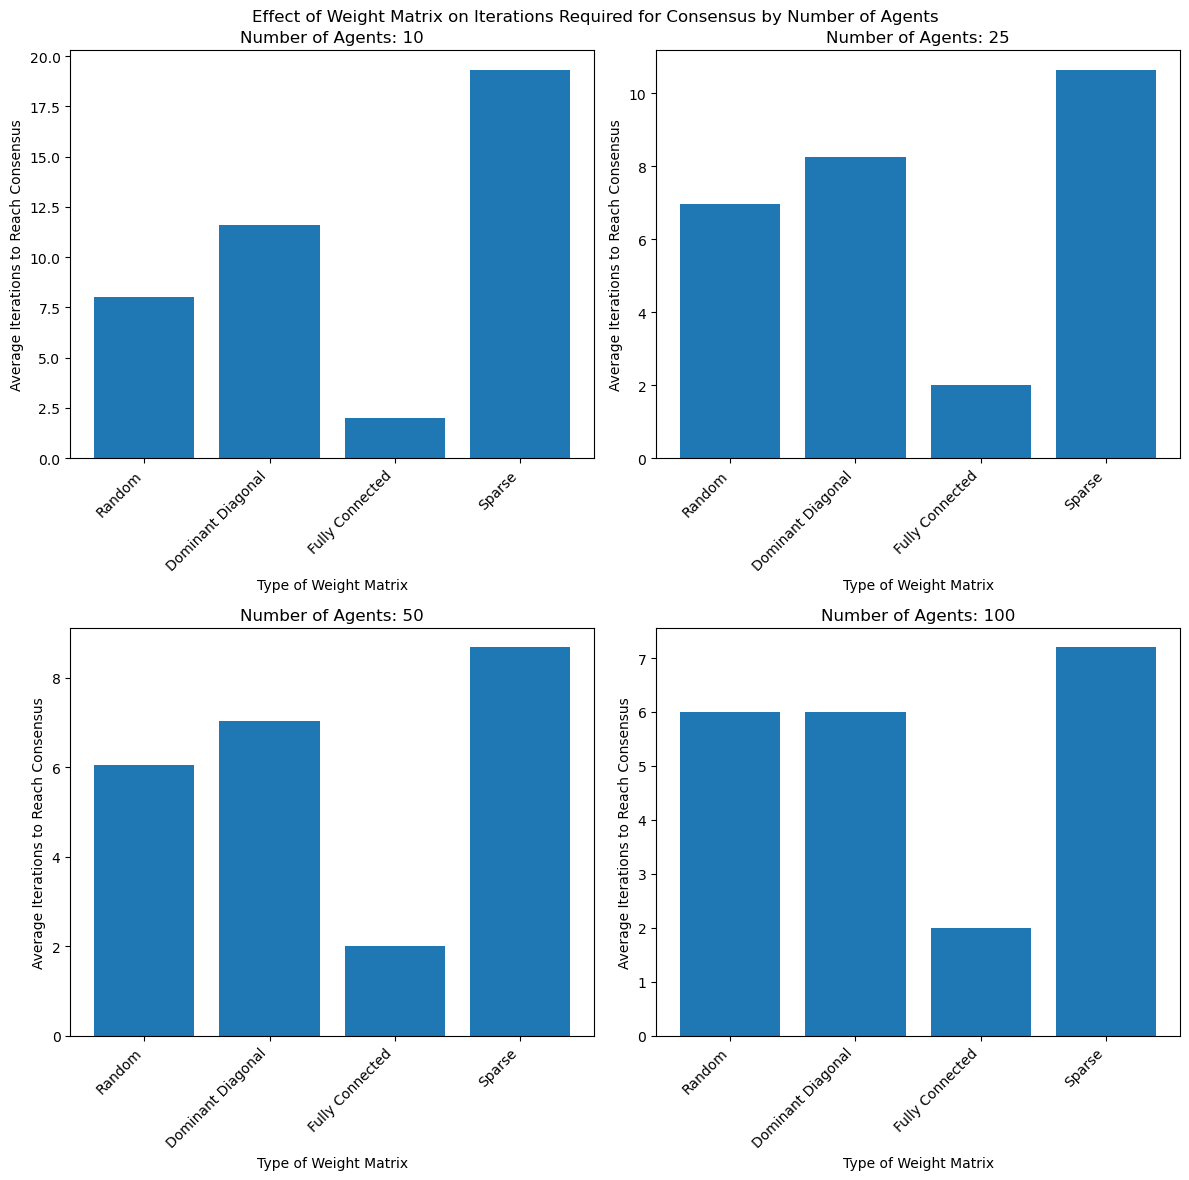

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Defining the random weight matrix

def create_random_weight_matrix(n_agents):
    W = np.random.rand(n_agents, n_agents)
    W = W / np.sum(W, axis=1, keepdims=True)
    return W

# Defining the dominant diagonal weight matrix

def create_dominant_diagonal_matrix(n_agents):
    W = np.random.rand(n_agents, n_agents) * 0.5  # Scaling down the off-diagonal weights
    np.fill_diagonal(W, 1)  # Maximising self-trust to 1 before normalisation
    W = W / np.sum(W, axis=1, keepdims=True)
    return W

# Defining the fully connected weight matrix

def create_fully_connected_matrix(n_agents):
    W = np.ones((n_agents, n_agents)) / n_agents
    # Normalising the rows is clearly unnecessary in this case
    return W

# Defining the sparse weight matrix

def create_sparse_matrix(n_agents, sparsity=0.5):
    W = np.random.rand(n_agents, n_agents)
    mask = np.random.rand(n_agents, n_agents) > sparsity
    W[mask] = 0
    np.fill_diagonal(W, 0.5 + np.random.rand(n_agents) * 0.5) 
    W = W / np.sum(W, axis=1, keepdims=True)
    return W

# Defining the model

def degroot_model(W, initial_opinions, max_iter=100, tolerance=1e-5):
    opinions = np.array(initial_opinions)
    for iteration in range(max_iter):
        new_opinions = np.dot(W, opinions)
        if np.allclose(new_opinions, opinions, atol=tolerance):
            break
        opinions = new_opinions
    return iteration + 1


# Defining and running investigation three (weight matrix)

def run_investigation_three(n_agents, num_simulations, ax):
    types_of_matrices = ['Random', 'Dominant Diagonal', 'Fully Connected', 'Sparse']
    average_iterations_needed = {typ: [] for typ in types_of_matrices}

    for _ in range(num_simulations):
        initial_opinions = np.random.uniform(-1, 1, n_agents)
        for matrix_type in types_of_matrices:
            if matrix_type == 'Random':
                W = create_random_weight_matrix(n_agents)
            elif matrix_type == 'Dominant Diagonal':
                W = create_dominant_diagonal_matrix(n_agents)
            elif matrix_type == 'Fully Connected':
                W = create_fully_connected_matrix(n_agents)
            elif matrix_type == 'Sparse':
                W = create_sparse_matrix(n_agents)

            # Averaging over the iterations
            num_iterations = degroot_model(W, initial_opinions)
            average_iterations_needed[matrix_type].append(num_iterations)

    # Labelling the plots
    bar_locations = np.arange(len(types_of_matrices))
    ax.bar(bar_locations, [np.mean(average_iterations_needed[typ]) for typ in types_of_matrices])
    ax.set_title(f'Number of Agents: {n_agents}')
    ax.set_xlabel('Type of Weight Matrix')
    ax.set_ylabel('Average Iterations to Reach Consensus')
    ax.set_xticks(bar_locations)
    ax.set_xticklabels(types_of_matrices, rotation=45, ha="right")

# Setting up the plot to be in a 2x2 grid (This allows me to present it concisely in the report)
fig, axs = plt.subplots(2, 2, figsize=(12, 12), tight_layout=True)
fig.suptitle('Effect of Weight Matrix on Iterations Required for Consensus by Number of Agents')

# Running the investigation for varying numbers of agents, with 1000 simulations for each
num_agents_list = [10, 25, 50, 100]
for n_agents, ax in zip(num_agents_list, axs.flatten()):
    run_investigation_three(n_agents, 25, ax)

plt.show()


I then define a similar investigation, seeing the impact of a range of agents, in a more continuous manner.

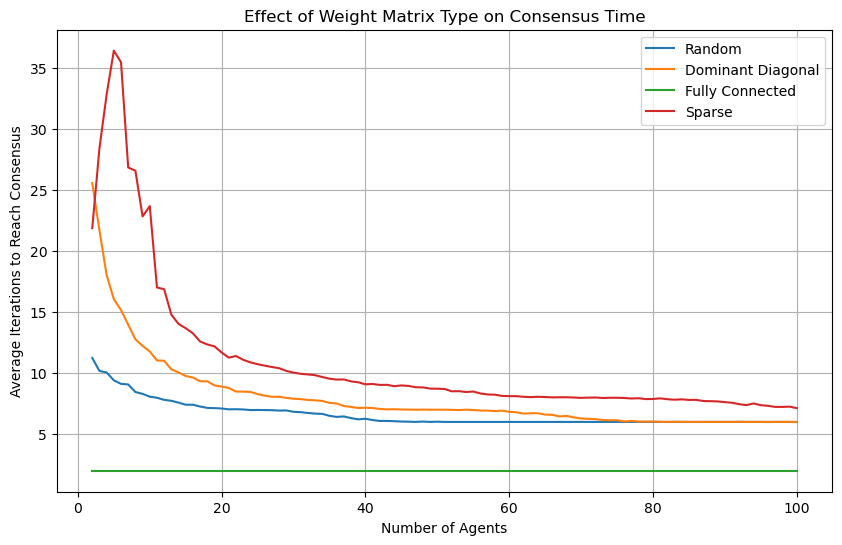

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def create_random_weight_matrix(n_agents):
    W = np.random.rand(n_agents, n_agents)
    W = W / np.sum(W, axis=1, keepdims=True)
    return W

def create_dominant_diagonal_matrix(n_agents):
    W = np.random.rand(n_agents, n_agents) * 0.5  
    np.fill_diagonal(W, 1)  
    W = W / np.sum(W, axis=1, keepdims=True)
    return W

def create_fully_connected_matrix(n_agents):
    W = np.ones((n_agents, n_agents)) / n_agents
    return W

def create_sparse_matrix(n_agents, sparsity=0.5):
    W = np.random.rand(n_agents, n_agents)
    mask = np.random.rand(n_agents, n_agents) > sparsity
    W[mask] = 0
    np.fill_diagonal(W, 0.5 + np.random.rand(n_agents) * 0.5)
    W = W / np.sum(W, axis=1, keepdims=True)
    return W

# Defining a model

def degroot_model(W, initial_opinions, max_iter=100, tolerance=1e-5):
    opinions = np.array(initial_opinions)
    for iteration in range(max_iter):
        new_opinions = np.dot(W, opinions)
        if np.allclose(new_opinions, opinions, atol=tolerance):
            break
        opinions = new_opinions
    return iteration + 1

# Defining a function to plot the impact of weight matrices, as number of agents increases

def run_investigation_four(min_agents, max_agents, num_simulations):
    agents_range = range(min_agents, max_agents + 1)
    iterations_needed = {'Random': [], 'Dominant Diagonal': [], 'Fully Connected': [], 'Sparse': []}

    for n_agents in agents_range: # Varying over the matrices, for each number of agents
        iterations = {typ: [] for typ in iterations_needed.keys()}
        for _ in range(num_simulations):
            initial_opinions = np.random.uniform(-1, 1, n_agents)
            for matrix_type in iterations_needed.keys():
                if matrix_type == 'Random':
                    W = create_random_weight_matrix(n_agents)
                elif matrix_type == 'Dominant Diagonal':
                    W = create_dominant_diagonal_matrix(n_agents)
                elif matrix_type == 'Fully Connected':
                    W = create_fully_connected_matrix(n_agents)
                elif matrix_type == 'Sparse':
                    W = create_sparse_matrix(n_agents)
                num_iterations = degroot_model(W, initial_opinions)
                iterations[matrix_type].append(num_iterations)
        for matrix_type in iterations_needed.keys():
            iterations_needed[matrix_type].append(np.mean(iterations[matrix_type]))
    
    plt.figure(figsize=(10, 6))
    for matrix_type, iterations in iterations_needed.items():
        plt.plot(list(agents_range), iterations, label=matrix_type)

    plt.xlabel('Number of Agents')
    plt.ylabel('Average Iterations to Reach Consensus')
    plt.title('Effect of Weight Matrix Type on Consensus Time')
    plt.legend()
    plt.grid(True)
    plt.show()

run_investigation_four(2, 100, 100)


Investigating the impact of different network toplogies on the Social Network DeGroot model: I implement different topologies in the calculation of the trust/connectivity matrix, as the weight matrix has predetermined values, depending on other variables. I implement the Erdos-Reyni network in the adjacency matrix, which is used to calculate the non-diagonal weight matrix entries. I plot a range of different edge probabilities, and hence see the impact of connecivity/trust.

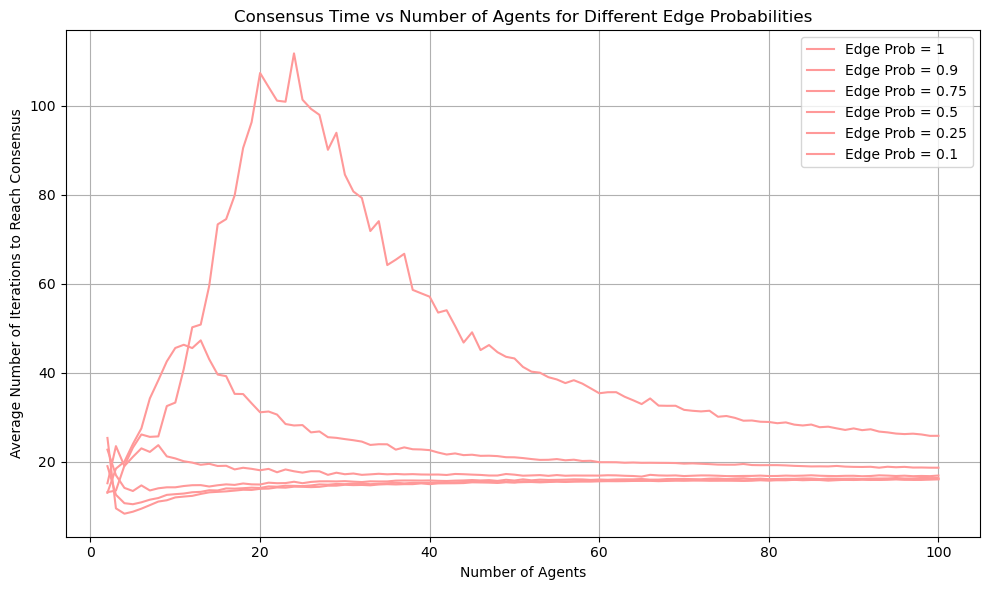

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

def social_network_degroot_model_er(n_agents, edge_prob=0.5, tolerance=1e-5, max_iter=200):
    G = nx.erdos_renyi_graph(n_agents, edge_prob)
    adj_matrix = nx.to_numpy_array(G)
    np.fill_diagonal(adj_matrix, 1)  
    
    betas = np.random.uniform(0, 0.5, n_agents)
    W = np.zeros_like(adj_matrix, dtype=float)
    for i in range(n_agents):
        if adj_matrix[i, i] == 1: 
            W[i, i] = betas[i]
        for j in range(n_agents):
            if i != j and adj_matrix[i, j] == 1:
                W[i, j] = (1 - betas[i]) * adj_matrix[i, j] / (np.sum(adj_matrix[i, :]) - 1)

    opinions = np.random.uniform(-1, 1, n_agents)

    for iteration in range(max_iter):
        new_opinions = np.dot(W, opinions)
        if np.allclose(new_opinions, opinions, atol=tolerance):
            break
        opinions = new_opinions

    return opinions, iteration + 1

def run_investigation_five(min_agents, max_agents, num_simulations, edge_probs):
    plt.figure(figsize=(10, 6))

    agents_range = range(min_agents, max_agents + 1)
    
    red_shades = ['#ffe5e5', '#ffcccc', '#ff9999', '#ff6666', '#ff3333', '#cc0000']
    
    for edge_prob in edge_probs:
        average_iterations_needed = []
        for n_agents in agents_range:
            iterations = []
            for _ in range(num_simulations):
                _, num_iterations = social_network_degroot_model_er(n_agents, edge_prob=edge_prob)
                iterations.append(num_iterations)
            average_iterations_needed.append(np.mean(iterations))
        
        plt.plot(list(agents_range), average_iterations_needed, label=f'Edge Prob = {edge_prob}', color=red_shades[index])
    
    plt.xlabel('Number of Agents')
    plt.ylabel('Average Number of Iterations to Reach Consensus')
    plt.title('Consensus Time vs Number of Agents for Different Edge Probabilities')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

edge_probs = [1, 0.9, 0.75, 0.5, 0.25, 0.1]

run_investigation_five(2, 100, 100, edge_probs)


My final central investigation to the Social Network DeGroot Model, is into a Hierarchal Network. I implemented this using ideas in graph theory, which I discuss more in the report. I see the impact of branching factors, and hence both connectivity, and layers in a network. I attempt to calculate and modify the depth to fit the number of agents. I initialise the branching factor as 2.

In [ ]:
def social_network_degroot_model_hn(n_agents, branching_factor=2, tolerance=1e-5, max_iter=1000):
    depth = np.ceil(np.log(n_agents+1) / np.log(branching_factor)).astype(int)
    G = nx.balanced_tree(branching_factor, depth-1)
    adj_matrix = nx.to_numpy_array(G)
    np.fill_diagonal(adj_matrix, 1) 
    
    betas = np.random.uniform(0, 0.5, len(G.nodes))
    W = np.zeros_like(adj_matrix, dtype=float)
    for i in range(len(G.nodes)):
        W[i, i] = betas[i] 
        for j in range(len(G.nodes)):
            if i != j and adj_matrix[i, j] == 1:
                W[i, j] = (1 - betas[i]) * adj_matrix[i, j] / (np.sum(adj_matrix[i, :]) - 1)

    opinions = np.random.uniform(-1, 1, len(G.nodes))

    for iteration in range(max_iter):
        new_opinions = np.dot(W, opinions)
        if np.allclose(new_opinions, opinions, atol=tolerance):
            break
        opinions = new_opinions

    return opinions, iteration + 1

def run_investigation_six(min_agents, max_agents, num_simulations, branching_factors):
    plt.figure(figsize=(10, 6))

    for branching_factor in branching_factors:
        agents_range = np.arange(min_agents, max_agents + 1)
        average_iterations_needed = []
        for n_agents in agents_range:
            iterations_needed = []
            for _ in range(num_simulations):
                _, iterations = social_network_degroot_model_hn(n_agents, branching_factor=branching_factor)
                iterations_needed.append(iterations)
            average_iterations_needed.append(np.mean(iterations_needed))

        plt.plot(agents_range, average_iterations_needed, label=f'Branching factor = {branching_factor}')
    
    plt.xlabel('Number of Agents')
    plt.ylabel('Average Number of Iterations to Reach Consensus')
    plt.title('Consensus Time vs Number of Agents in Hierarchical Networks')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

branching_factors = [3, 4, 5]
run_investigation_six(2, 200, 10, branching_factors)


Defining the function for the Deffuant Model. I define a set of functions that interact and also pass the intiial conditions as a function into other functions. Due to the complexity of the function, I have commented a lot of it. The order of implementation is chosen carefully as each function factors into the next one.

In [22]:
import numpy as np
import matplotlib.pyplot as plt

class PredictionMarketModel:
    def __init__(self, N, T, mu, epsilon, gamma, sigma_sq): # Essentially the initial conditons
        self.N = N  # Number of agents
        self.T = T  # The market duration, converted to days
        self.mu = mu  # Convergence parameter
        self.epsilon = epsilon  # Open-mindedness threshold
        self.gamma = gamma  # Scaling parameter for the market participation probability
        self.sigma_sq = sigma_sq  # Variance of noise in excess demand
        self.agents_opinions = np.random.uniform(0, 1, N)  # Initial opinions
        self.current_price = 0.5  # Initial market price

    def update_opinions(self): # Opinion updating mechanism, corresponding to the convergent parameters and open-mindedness threshold
        # Randomly select two agents
        i, j = np.random.choice(self.N, 2, replace=False)
        # Update opinions if within the threshold
        if abs(self.agents_opinions[i] - self.agents_opinions[j]) < self.epsilon: # If opinions are sufficiently close, the opinions of both agents update according to the opinion update rule
            self.agents_opinions[i] += self.mu * (self.agents_opinions[j] - self.agents_opinions[i])
            self.agents_opinions[j] += self.mu * (self.agents_opinions[i] - self.agents_opinions[j])

    def market_participation_probability(self, tau):
        return (self.T - tau) ** (-self.gamma)
    
    # Determines the demand if an agent participates

    def trade_decision(self, tau): # The previous calculation is used here
        probability = self.market_participation_probability(tau)
        demands = [] # Initialising the demand variable
        for opinion in self.agents_opinions: # Iterate over the set of opinion
            if np.random.random() < probability:  # If the agent decides to participate (this is determined by the probability
                                                  # and hence I implement this by randomly determing if it's in the range
                demands.append(opinion - self.current_price)  # calculating demand
        return demands
    
    # Similar purpose to before, but now for the update price

    def update_price(self, demands): # The set of "demands" from the previous function is passed as a variable
        noise = np.random.normal(0, np.sqrt(self.sigma_sq)) # Randomised noise
        excess_demand = noise * np.sum(demands)  # Noise used to calculate excess demand
        return excess_demand
    
    # This functions gathers all the information and calculates some statistical inferences

    def simulate(self):
        market_price = [self.current_price]
        opinions_history = [np.mean(self.agents_opinions)]
        excess_demand_history = [] 
        for tau in range(self.T):
            self.update_opinions()
            opinions_history.append(np.mean(self.agents_opinions))
            demands = self.trade_decision(tau)
            excess_demand = self.update_price(demands)
            excess_demand_history.append(excess_demand)  
            # Updates "market price" based on whether there is excess demand
            if excess_demand >= 0:
                self.current_price = min(1, self.current_price + excess_demand)
            else:
                self.current_price = max(0, self.current_price + excess_demand)
            market_price.append(self.current_price)
        return market_price, opinions_history, excess_demand_history

This is my first invetsigation of the model, where I range over different number of agents. Then beneath that is the same simulation but plotted as a 3 by 3 graph.

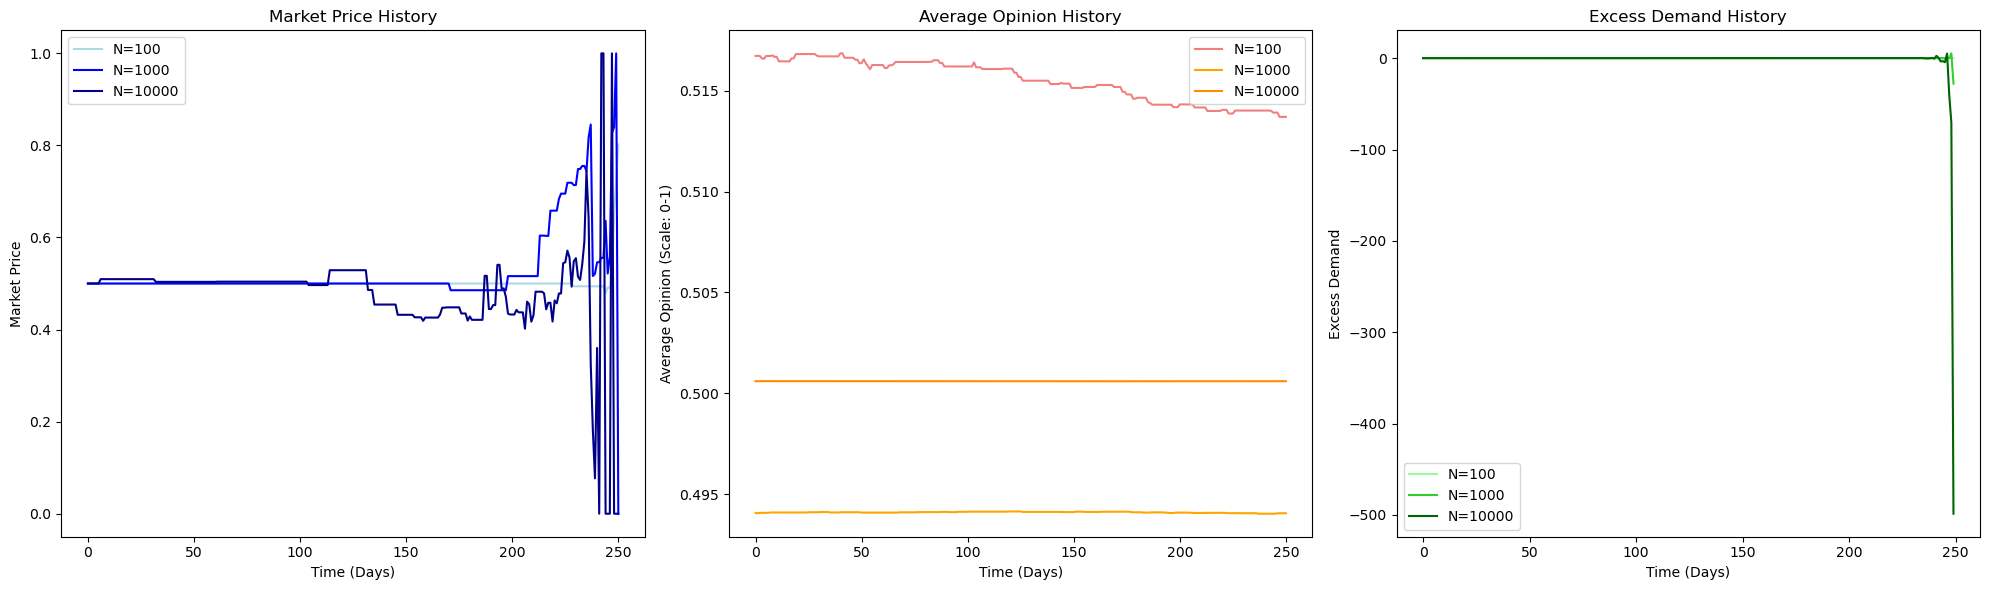

In [23]:
n_agents = [100, 1000, 10000]
epsilon = 0.1
T = 250 # Time of simulation
mu = 0.5
gamma = 2.44
# sigma_sq = 0.05
sigma_sq = 0.01
plt.figure(figsize=(20, 6))

# Range of colours
colours_market_price = ['lightblue', 'blue', 'darkblue']
colours_opinion_history = ['lightcoral', 'orange', 'darkorange']
colours_excess_demand = ['palegreen', 'limegreen', 'darkgreen'] 

# Looping over the range of agents
for index, N in enumerate(n_agents):
    model = PredictionMarketModel(N, T, mu, epsilon, gamma, sigma_sq)
    price_history, opinions_history, excess_demand_history = model.simulate()

    # Market Price History
    plt.subplot(1, 3, 1)
    plt.plot(price_history, label=f'N={N}', color=colours_market_price[index])
    plt.title('Market Price History')
    plt.xlabel('Time (Days)')
    plt.ylabel('Market Price')
    plt.legend()

    # Average Opinion History
    plt.subplot(1, 3, 2)
    plt.plot(opinions_history, label=f'N={N}', color=colours_opinion_history[index])
    plt.title('Average Opinion History')
    plt.xlabel('Time (Days)')
    plt.ylabel('Average Opinion (Scale: 0-1)') # I label this as it differs from the DeGroot model
    plt.legend()

    # Excess Demand History
    plt.subplot(1, 3, 3)
    plt.plot(excess_demand_history, label=f'N={N}', color=colours_excess_demand[index])
    plt.title('Excess Demand History')
    plt.xlabel('Time (Days)')
    plt.ylabel('Excess Demand')
    plt.legend()

plt.tight_layout()
plt.show()


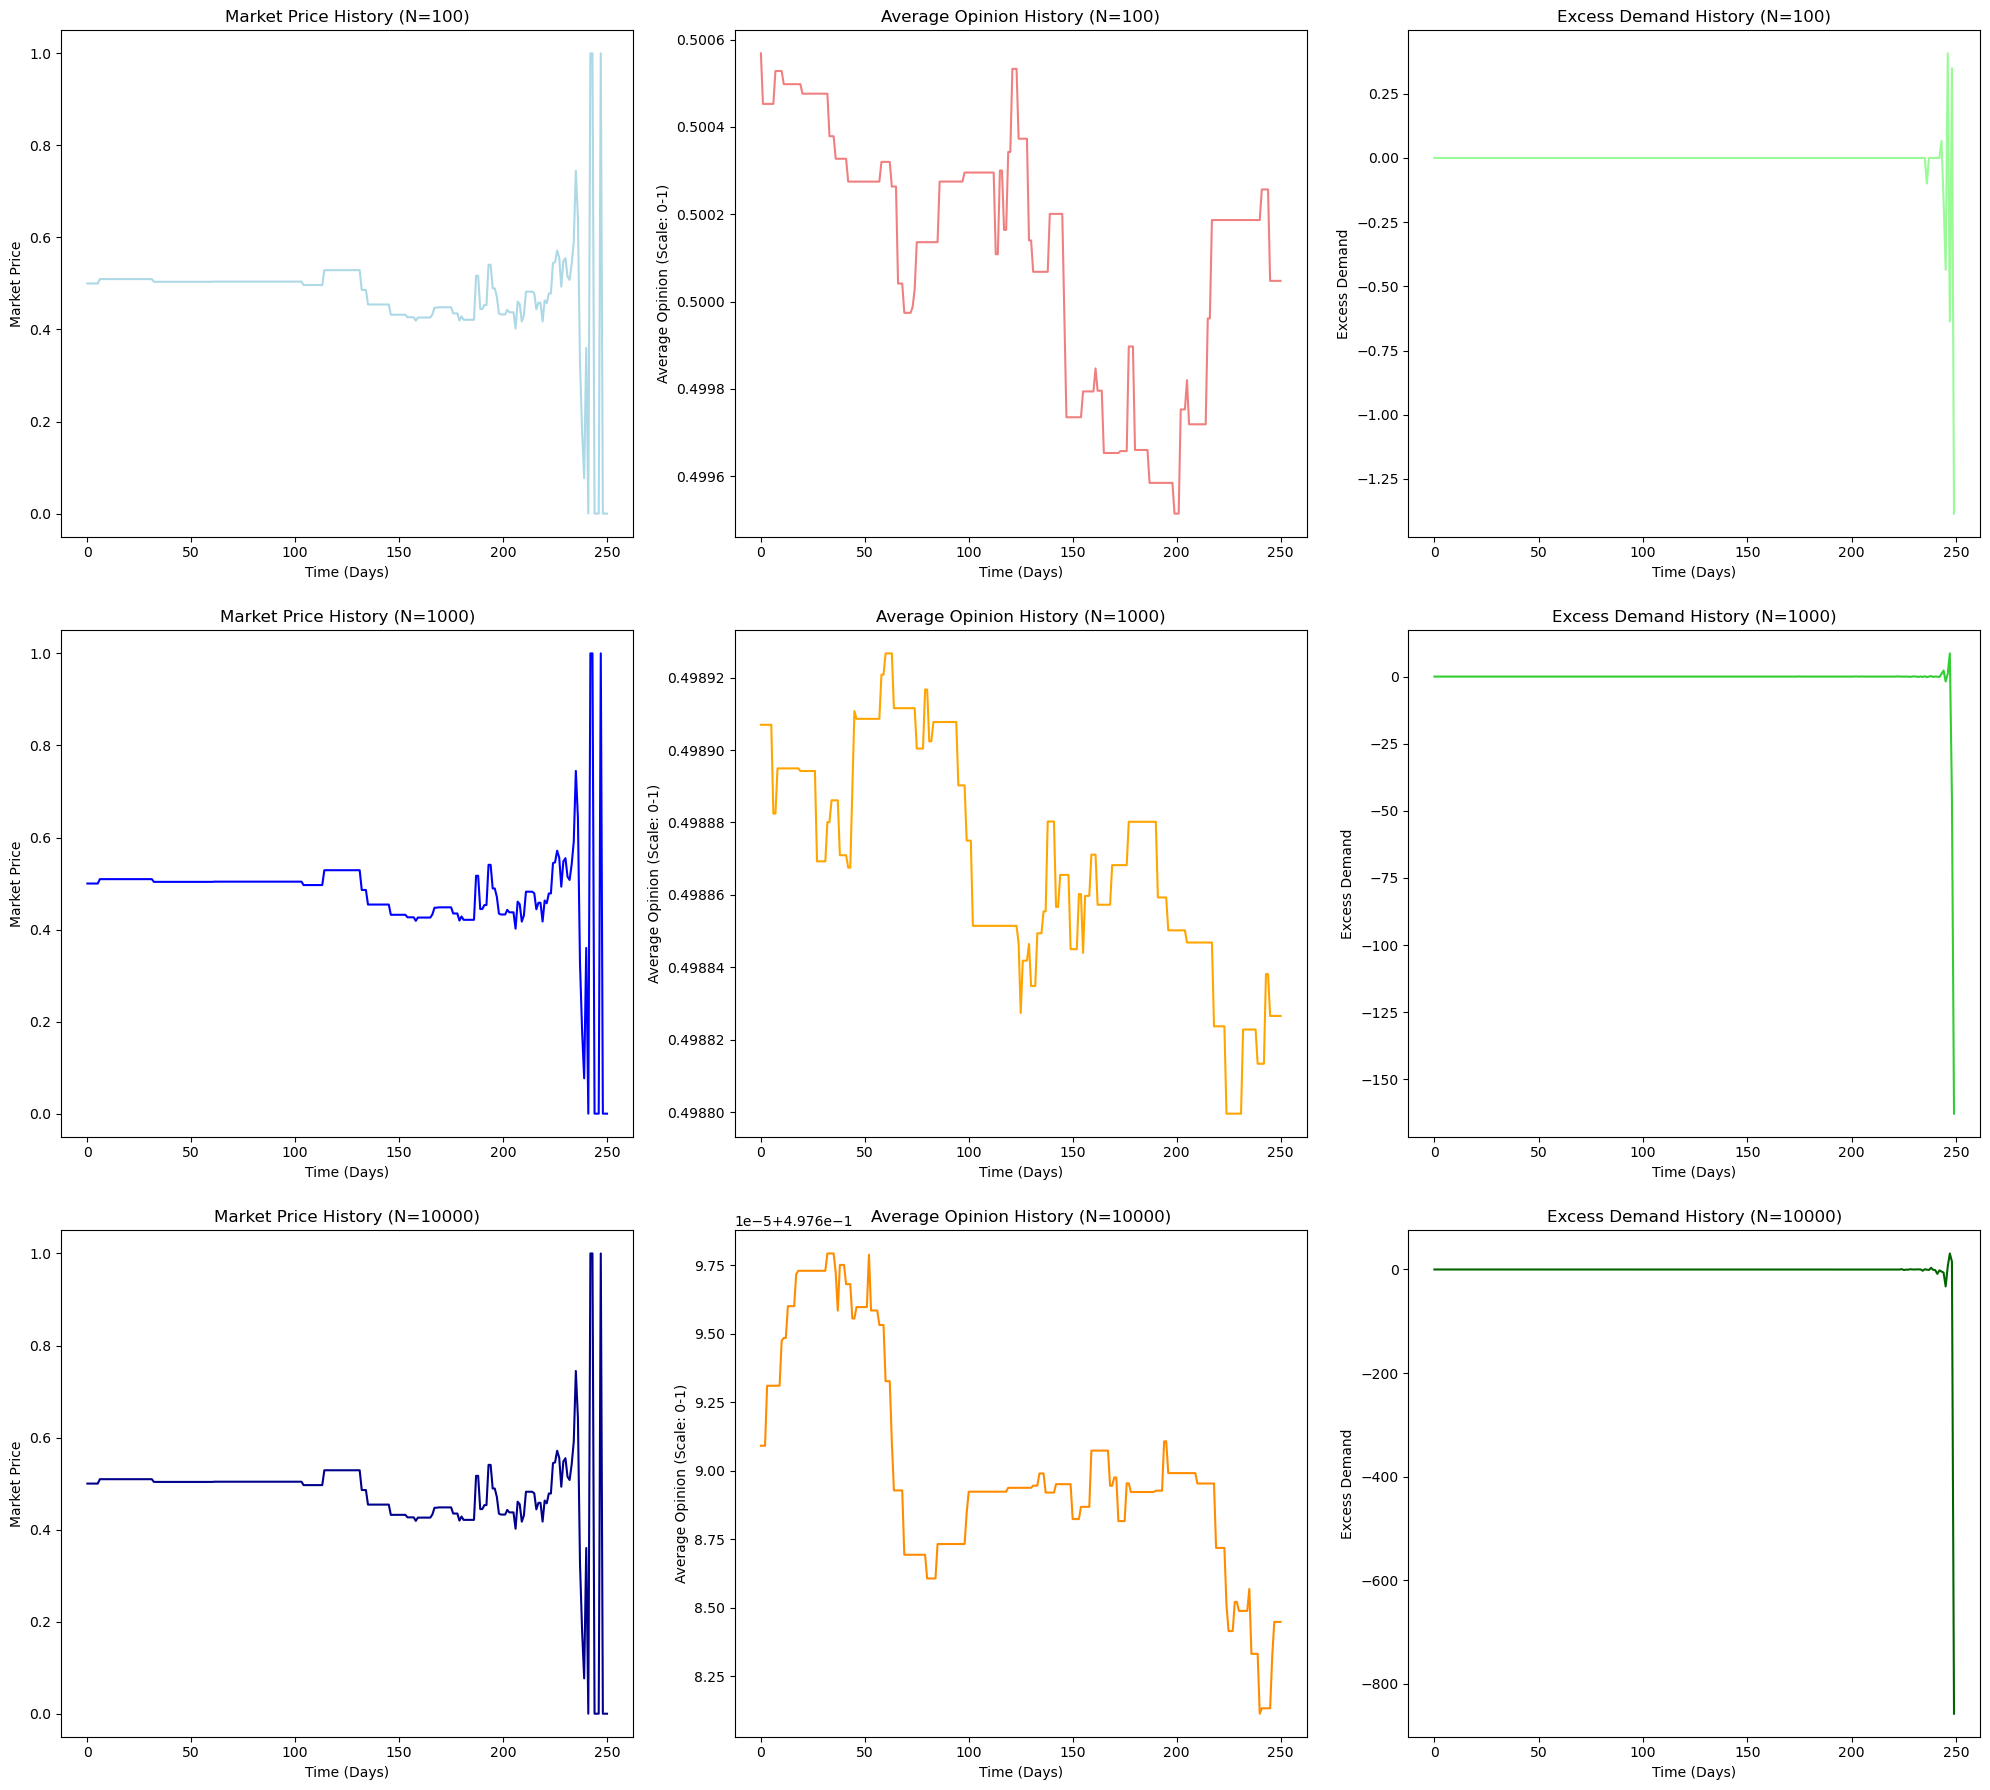

In [27]:
plt.figure(figsize=(20, 18))

for i, N in enumerate(n_agents):
    model = PredictionMarketModel(N, T, mu, epsilon, gamma, sigma_sq)
    market_price, opinions_history, excess_demand_history = model.simulate()
    
    # Market Price History
    plt.subplot(3, 3, 3 * i + 1)
    plt.plot(price_history, color=colours_market_price[i])
    plt.title(f'Market Price History (N={N})')
    plt.xlabel('Time (Days)')
    plt.ylabel('Market Price')

    # Average Opinion History
    plt.subplot(3, 3, 3 * i + 2)
    plt.plot(opinions_history, color=colours_opinion_history[i])
    plt.title(f'Average Opinion History (N={N})')
    plt.xlabel('Time (Days)')
    plt.ylabel('Average Opinion (Scale: 0-1)')

    # Excess Demand History
    plt.subplot(3, 3, 3 * i + 3)
    plt.plot(excess_demand_history, color=colours_excess_demand[i])
    plt.title(f'Excess Demand History (N={N})')
    plt.xlabel('Time (Days)')
    plt.ylabel('Excess Demand')

plt.tight_layout()
plt.show()

I then investigate the impact of the market noise, done through varying the variance parameter, in the simulations:

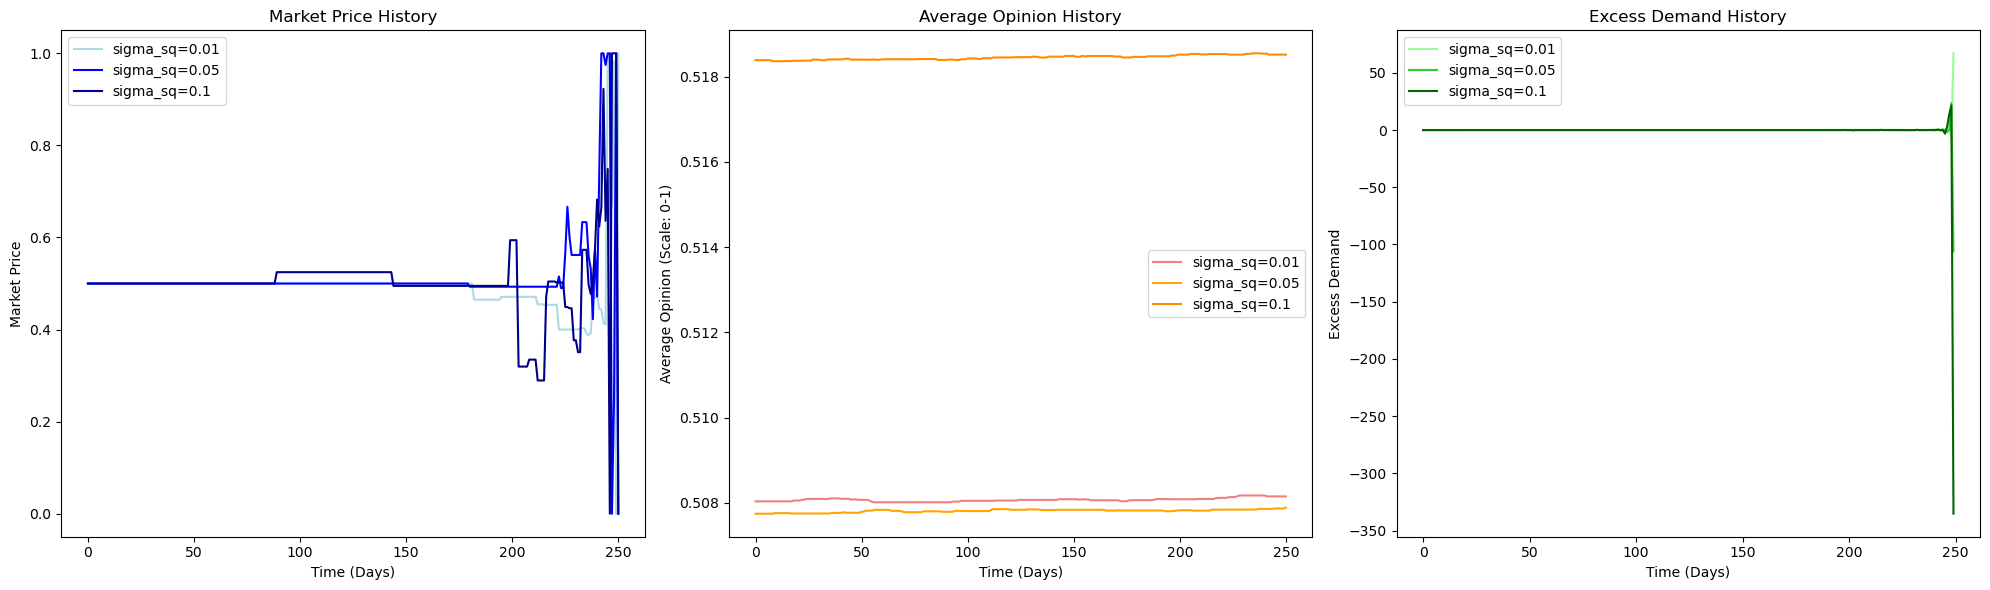

In [24]:
sigma_sq_values = [0.01, 0.05, 0.1]
epsilon = 0.1
N = 1000
T = 250
mu = 0.5
gamma = 2.44

plt.figure(figsize=(20, 6))

colours_market_price = ['lightblue', 'blue', 'darkblue']
colours_opinion_history = ['lightcoral', 'orange', 'darkorange']
colours_excess_demand = ['palegreen', 'limegreen', 'darkgreen']

for index, sigma_sq in enumerate(sigma_sq_values): # varying over the variance values
    model = PredictionMarketModel(N, T, mu, epsilon, gamma, sigma_sq)
    market_price, opinions_history, excess_demand_history = model.simulate()

    plt.subplot(1, 3, 1)
    plt.plot(market_price, label=f'sigma_sq={sigma_sq}', color=colours_market_price[index])
    plt.title('Market Price History')
    plt.xlabel('Time (Days)')
    plt.ylabel('Market Price')
    plt.legend()

    plt.subplot(1, 3, 2)
    plt.plot(opinions_history, label=f'sigma_sq={sigma_sq}', color=colours_opinion_history[index])
    plt.title('Average Opinion History')
    plt.xlabel('Time (Days)')
    plt.ylabel('Average Opinion (Scale: 0-1)')
    plt.legend()

    plt.subplot(1, 3, 3)
    plt.plot(excess_demand_history, label=f'sigma_sq={sigma_sq}', color=colours_excess_demand[index])
    plt.title('Excess Demand History')
    plt.xlabel('Time (Days)')
    plt.ylabel('Excess Demand')
    plt.legend()

plt.tight_layout()
plt.show()

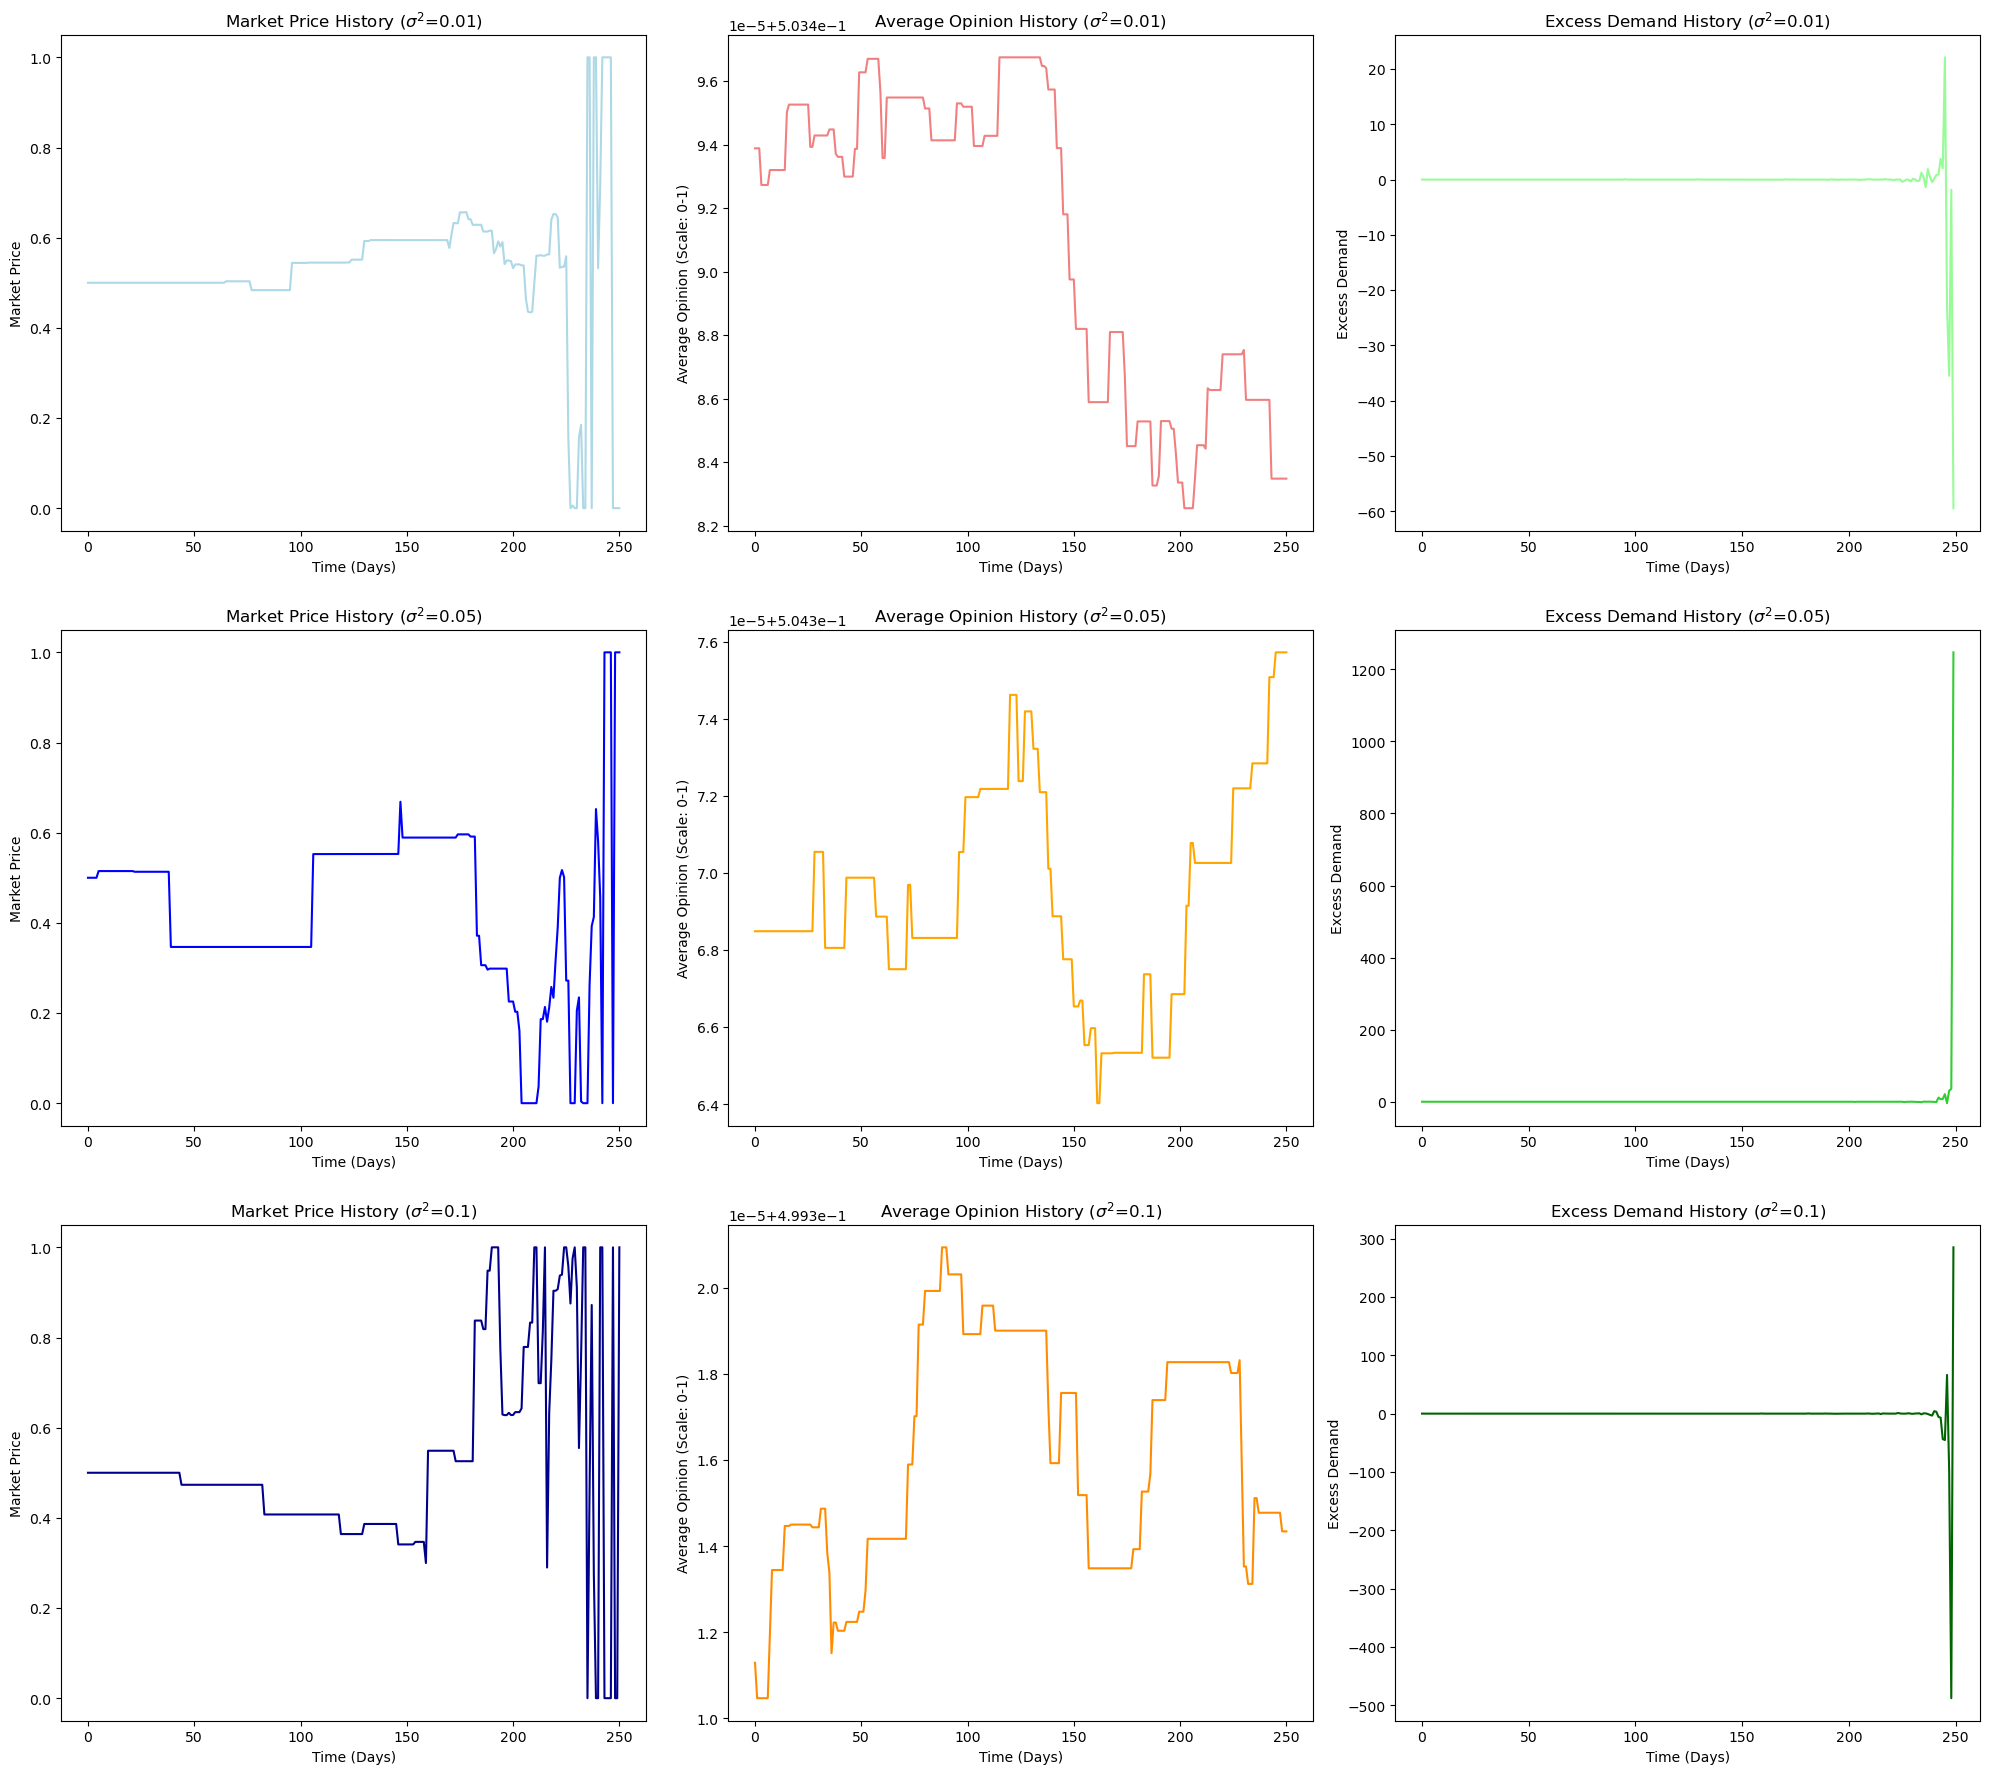

In [28]:
plt.figure(figsize=(20, 18)) 

for i, sigma_sq in enumerate(sigma_sq_values):
    model = PredictionMarketModel(N, T, mu, epsilon, gamma, sigma_sq)
    price_history, opinions_history, excess_demand_history = model.simulate()
    
    # Market Price History 
    plt.subplot(len(sigma_sq_values), 3, 3 * i + 1)
    plt.plot(price_history, color=colours_market_price[i])
    plt.title(f'Market Price History ($\sigma^2$={sigma_sq})')
    plt.xlabel('Time (Days)')
    plt.ylabel('Market Price')

    # Average Opinion History
    plt.subplot(len(sigma_sq_values), 3, 3 * i + 2)
    plt.plot(opinions_history, color=colours_opinion_history[i])
    plt.title(f'Average Opinion History ($\sigma^2$={sigma_sq})')
    plt.xlabel('Time (Days)')
    plt.ylabel('Average Opinion (Scale: 0-1)')

    # Excess Demand History 
    plt.subplot(len(sigma_sq_values), 3, 3 * i + 3)
    plt.plot(excess_demand_history, color=colours_excess_demand[i])
    plt.title(f'Excess Demand History ($\sigma^2$={sigma_sq})')
    plt.xlabel('Time (Days)')
    plt.ylabel('Excess Demand')

plt.tight_layout()
plt.show()

Emmission: Histogram Classification Methodology to Evaluate and Opinion Dynamic Model In It's Development Process

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the histogram plotting function

def plot_histogram(bins, H_tilde, T1, T2):
    bin_centers = (bins[:-1] + bins[1:]) / 2
    colors = ['green' if count > T1 else 'blue' if count < T2 else 'red' for count in H_tilde]

    plt.bar(bin_centers, H_tilde, width=(bins[1] - bins[0]), color=colors, align='center')
    plt.xlabel('Opinion')
    plt.ylabel('Normalised Amount (%)')
    plt.title('Opinion Distribution Histogram')
    plt.show()

# Define the classify histogram function
    
def classify_histogram(opinions, M, B, K, T1, T2):
    
    # Step 2: Partition [-1, 1] into M bins of equal width
    bins = np.linspace(-1, 1, M + 1)
    
    # Step 3: Count the number of opinions in each bin
    H, _ = np.histogram(opinions, bins=bins)
    
    # Step 4: Normalise the bin counts
    H_tilde = H / sum(H) * 100
  
    # Step 5: Classify the bins based on thresholds, as provided in the algorithm in text (in the appendix now)
    colors = ['green' if count > T1 else 'blue' if count < T2 else 'red' for count in H_tilde]
    
    plot_histogram(bins, H_tilde, T1, T2)
    
    # Step 6: Group consecutive binns
    groups = []
    current_group = []
    for color in colors:
        if color == 'green' or color == 'red':
            current_group.append(color)
        elif current_group:
            groups.append(current_group)
            current_group = []
    if current_group:
        groups.append(current_group)
        
    num_groups = len(groups)
    
    # Step 7: Classify histogram based on the algorithm
    if num_groups == 1 and 'green' in groups[0]:
        return 'Perfect Consensus'
    elif num_groups == 1 and len(groups[0]) <= B:
        return 'Consensus'
    elif num_groups == 2 and len(groups[0]) <= B and len(groups[1]) <= B and ('green' not in groups[0] or 'green' not in groups[1]):
        return 'Polarisation'
    elif num_groups >= 2 and sum(len(group) for group in groups) > B:
        return 'Clustering'
    else:
        return 'Dissensus'

Emmited investigations: Here are some investigations into the model that I emmited and mainfly function as ways for me to test the model implementations, to see if I code them and the simulations correctly.

Impact of Number of Simulations (this is so I could gather what amount would be the optimal amount to investigate).

In [ ]:
def degroot_model_two(W, initial_opinions, max_iter=100, tolerance=1e-5):
    opinions = np.array(initial_opinions)
    for iteration in range(max_iter):
        new_opinions = np.dot(W, opinions)
        if np.allclose(new_opinions, opinions, atol=tolerance):
            break
        opinions = new_opinions
    return iteration + 1

def run_investigation_alpha(min_agents, max_agents, num_simulations):
    agents_range = range(min_agents, max_agents + 1)
    average_iterations_needed = []

    for n_agents in agents_range:
        iterations = []
        for _ in range(num_simulations):
            W = np.random.rand(n_agents, n_agents)
            W = W / np.sum(W, axis=1, keepdims=True)
            initial_opinions = np.random.uniform(-1, 1, n_agents)
            num_iterations = degroot_model_two(W, initial_opinions)
            iterations.append(num_iterations)
        average_iterations_needed.append(np.mean(iterations))

    return agents_range, average_iterations_needed

# Running the investigations
range_1, iterations_1 = run_investigation_two(2, 50, 10)
range_2, iterations_2 = run_investigation_two(2, 50, 25)
range_3, iterations_3 = run_investigation_two(2, 50, 50)
range_4, iterations_4 = run_investigation_two(2, 50, 100)

# Plotting all the results on the same graph
plt.plot(range_1, iterations_1, label='10 simulations per count')
plt.plot(range_2, iterations_2, label='25 simulations per count')
plt.plot(range_3, iterations_3, label='50 simulations per count')
plt.plot(range_4, iterations_4, label='100 simulations per count')
plt.xlabel('Number of Agents')
plt.ylabel('Average Iterations Required to Reach Consensus')
plt.title('Comparison of Average Iterations to Reach Consensus for Varying Amounts of Agents')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Impact of initial opinions distribution. I investigate the impact of different initial opinions, and the extent of the influence of initial opinions, dependent on the number of agents. The types of initial opinions we investigate, are random, positive bias, polarised, and uniform respectively. Random opinions are uniformly distributed between the overall interval. Positively biased are uniformly distrubted in [0,1]. Completely polarised opinions are split between half that strongly agree and half that strongly disagree. In the uniform case, all the agents start with agreement (the value they all share being randomly chosen). This case essentially works as a simulation check.

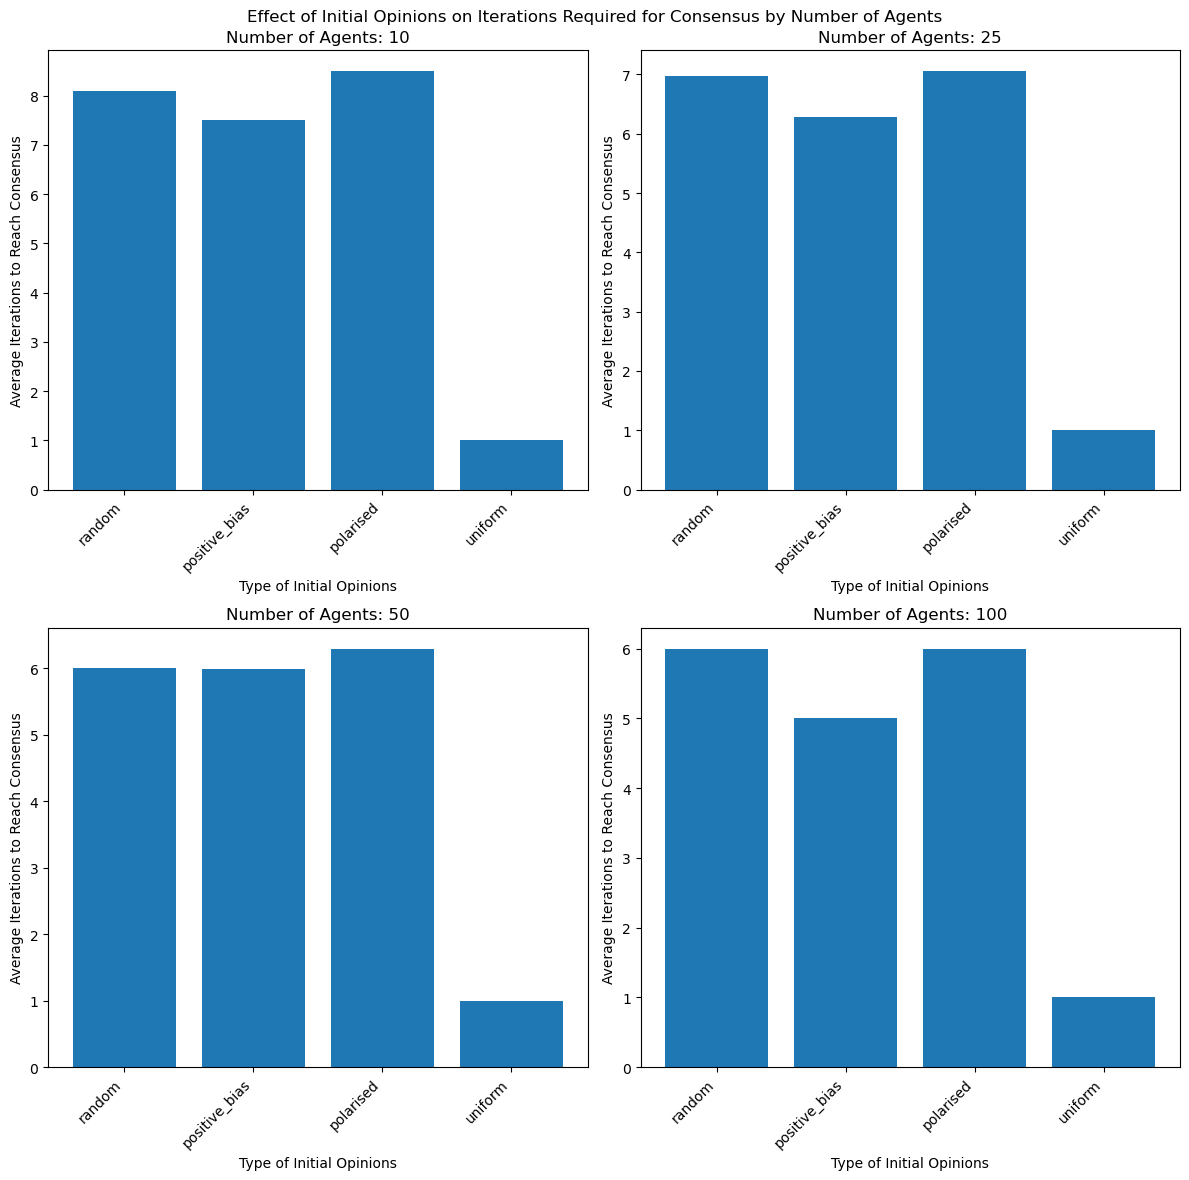

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def degroot_model(W, initial_opinions, max_iter=100, tolerance=1e-5):
    opinions = np.array(initial_opinions)
    for iteration in range(max_iter):
        new_opinions = np.dot(W, opinions)
        if np.allclose(new_opinions, opinions, atol=tolerance):
            break
        opinions = new_opinions
    return iteration + 1

# Defining the function to run the investigation

def run_investigation_beta(n_agents, num_simulations, opinion_type):
    iterations_needed = []

    for _ in range(num_simulations):
        W = np.random.rand(n_agents, n_agents)
        W = W / np.sum(W, axis=1, keepdims=True)

        # Loop structure is similar to weight matrix investigation (investigation 4) but now different conditions are passed for initial opinions
        if opinion_type == "random":
            initial_opinions = np.random.uniform(-1, 1, n_agents)
        elif opinion_type == "positive_bias":
            initial_opinions = np.random.uniform(0, 1, n_agents)
        elif opinion_type == "polarised":
            half_agents = n_agents // 2
            initial_opinions = np.array([1] * half_agents + [-1] * half_agents)
            if n_agents % 2 != 0:  # If n_agents is odd, add one more element
                initial_opinions = np.append(initial_opinions, np.random.choice([-1, 1]))
            np.random.shuffle(initial_opinions)
        elif opinion_type == "uniform":
            initial_opinions = np.full(n_agents, np.random.uniform(-1, 1))

        iterations = degroot_model(W, initial_opinions)
        iterations_needed.append(iterations)

    return np.mean(iterations_needed)

n_agents = 100
num_simulations = 1000

fig, axs = plt.subplots(2, 2, figsize=(12, 12), tight_layout=True)
fig.suptitle('Effect of Initial Opinions on Iterations Required for Consensus by Number of Agents')

opinion_types = ["random", "positive_bias", "polarised", "uniform"]
num_agents_list = [10, 25, 50, 100]

# Generating data to range over the agents and opinion types
investigation_results = {}
for n_agents in num_agents_list:
    investigation_results[n_agents] = {}
    for opinion_type in opinion_types:
        avg_iterations = run_investigation_beta(n_agents, 1000, opinion_type)
        investigation_results[n_agents][opinion_type] = avg_iterations

# Plotting the results in a 2x2 grid
for i, (n_agents, results) in enumerate(investigation_results.items()):
    ax = axs.flatten()[i]
    opinion_keys = list(results.keys())
    bar_positions = np.arange(len(opinion_keys))
    ax.bar(bar_positions, results.values(), tick_label=opinion_keys)
    ax.set_title(f'Number of Agents: {n_agents}')
    ax.set_xlabel('Type of Initial Opinions')
    ax.set_ylabel('Average Iterations to Reach Consensus')
    ax.set_xticks(bar_positions)  
    ax.set_xticklabels(opinion_keys, rotation=45, ha="right")

plt.show()
